In [1]:
import pandas as pd
import nltk
from functools import reduce
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
from wordcloud import WordCloud, ImageColorGenerator

#### Configuration

In [2]:
PATH_CLIMATE = "climate_speeches_large_annotated.csv"
PATH_FEMINISM = "feminism_speeches_annotated.csv"
PATH_ASYL = "asyl_annotated_final.csv"

TOPIC_CLIMATE = "Climate"
TOPIC_FEMINISM = "Feminism"
TOPIC_ASYL = "Asyl"

TERMS_CLIMATE = "technical_terms_climate.csv"
TERMS_FEMINISM = "technical_terms_feminism.csv"
TERMS_ASYL = "technical_terms_asyl.csv"

PDF_FOLDER_CLIMATE = "plots/climate/"
PDF_FOLDER_FEMINISM = "plots/feminism/"
PDF_FOLDER_ASYL = "plots/asyl/"

ALL_CLIMATE = (PATH_CLIMATE, TOPIC_CLIMATE, TERMS_CLIMATE, PDF_FOLDER_CLIMATE)
ALL_FEMINISM = (PATH_FEMINISM, TOPIC_FEMINISM, TERMS_FEMINISM, PDF_FOLDER_FEMINISM)
ALL_ASYL = (PATH_ASYL, TOPIC_ASYL, TERMS_ASYL, PDF_FOLDER_ASYL)

The topic can be specified by changing the topic of the ALL_TOPIC variable to the desired topic

In [3]:
PATH_CHOSEN, TOPIC_CHOSEN, TERMS_CHOSEN, PDF_FOLDER_CHOSEN = ALL_CLIMATE

A set of 8 colorblind-friendly colors from Bang Wong’s Nature Methods paper https://www.nature.com/articles/nmeth.1618.pdf

Taken from https://scottplot.net/cookbook/4.1/colors/#colorblind-friendly

In [4]:
HEX_COLORS = ['#000000','#E69F00','#56B4E9','#009E73','#F0E442','#0072B2','#D55E00','#CC79A7']
RGB_COLORS = [mcolors.hex2color(hex_color) for hex_color in HEX_COLORS]

WORD_CLOUD_COLORS = mcolors.ListedColormap(RGB_COLORS)
BAR_CHART_COLOR = RGB_COLORS[2]

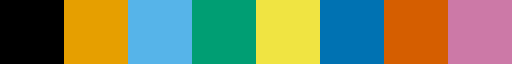

In [5]:
WORD_CLOUD_COLORS

Create the dataframe for the chosen topic

In [6]:
df_start = pd.read_csv(PATH_CHOSEN)

#### Simple analysis for showing how many were relevant and how many were irrelevant

In [7]:
df_start["label"].value_counts()

Relevant      787
Irrelevant     97
Name: label, dtype: int64

In [9]:
787/(787 + 97) * 100

89.02714932126696

In [ ]:
bar_order = ["Relevant", "Irrelevant"]

plot = df_start["label"].value_counts().loc[bar_order].plot(kind='bar',color=BAR_CHART_COLOR,title="Amount of relevant and irrelevant speeches found (Topic = {topic})".format(topic=TOPIC_CHOSEN))

fig = plot.get_figure()
fig.tight_layout()
fig.savefig(PDF_FOLDER_CHOSEN + 'plot_value_counts_{topic}.pdf'.format(topic=TOPIC_CHOSEN), format='pdf')

#### Find out which of the terms are included in the speeches most often

In [ ]:
all_texts = df_start["text"].to_list()
relevant_texts = df_start[df_start["label"]=="Relevant"]["text"].to_list()
irrelevant_texts = df_start[df_start["label"]=="Irrelevant"]["text"].to_list()

In [ ]:
df_terms = pd.read_csv(TERMS_CHOSEN)
df_terms.columns = ["TO_DROP","terms"]
df_terms = df_terms.drop("TO_DROP",axis=1)

terms_set = set(df_terms["terms"].to_list())

In [ ]:
def create_wordcloud_from_total_counts(total_counts_dict, title):
    wordcloud = WordCloud(width = 1000, height = 500,background_color="white",colormap=WORD_CLOUD_COLORS).generate_from_frequencies(total_counts_dict)

    plt.figure(figsize=(15,8))
    plt.axis("off")
    plt.title(title)
    plt.imshow(wordcloud)

    return wordcloud
def get_total_count_for_texts(texts, word_set):
    res = []
    
    for text in texts:
        res.append(get_count_per_word_in_set(text, word_set))
    
    return havok_method(res)
    

# https://stackoverflow.com/questions/10461531/merge-and-sum-of-two-dictionaries answer of SCB
def havok_method(dictionaries):
    def reducer(accumulator, element):
        for key, value in element.items():
            accumulator[key] = accumulator.get(key, 0) + value
        return accumulator
    return reduce(reducer, dictionaries, {})

def get_count_per_word_in_set(text, word_set):
    tokens = _get_tokens_from_text(text)
    res = {}
    
    for word in word_set:
        res[word] = 0
    
    for word in tokens:
        if word in word_set:
            res[word] += 1
    
    return res
    
    

def _get_tokens_from_text(text):
    sentences = nltk.sent_tokenize(text,language='german')
    tokens = []
    
    for sentence in sentences:
        tokenized_sent = nltk.tokenize.word_tokenize(sentence,language='german')
        tokens.extend(tokenized_sent)
    
    return tokens

In [ ]:
total_count_overall = get_total_count_for_texts(all_texts,terms_set)

total_count_relevant = get_total_count_for_texts(relevant_texts,terms_set)

total_count_irrelevant = get_total_count_for_texts(irrelevant_texts,terms_set)

#### Wordclouds

In [ ]:
plot = create_wordcloud_from_total_counts(total_count_overall, "Word Cloud - All technical terms (Topic = {topic})".format(topic=TOPIC_CHOSEN))

plot.to_file(PDF_FOLDER_CHOSEN + 'plot_word_cloud_all_{topic}.pdf'.format(topic=TOPIC_CHOSEN))

In [ ]:
plot = create_wordcloud_from_total_counts(total_count_relevant, "Word Cloud - Technical terms found in relevant texts (Topic = {topic})".format(topic=TOPIC_CHOSEN))

plot.to_file(PDF_FOLDER_CHOSEN + 'plot_word_cloud_relevant_{topic}.pdf'.format(topic=TOPIC_CHOSEN))

In [ ]:
plot = create_wordcloud_from_total_counts(total_count_irrelevant, "Word Cloud - Technical terms found in irrelevant texts (Topic = {topic})".format(topic=TOPIC_CHOSEN))

plot.to_file(PDF_FOLDER_CHOSEN + 'plot_word_cloud_irrelevant_{topic}.pdf'.format(topic=TOPIC_CHOSEN))

Words ranked by the amount they are showing up. Plots are created where the total amount of appearances for the top 10 words is displayed

In [ ]:
df_total_count_overall = pd.DataFrame(total_count_overall.items(), columns=['term', 'amount'])
df_total_count_relevant = pd.DataFrame(total_count_relevant.items(), columns=['term', 'amount'])
df_total_count_irrelevant = pd.DataFrame(total_count_irrelevant.items(), columns=['term', 'amount'])

In [ ]:
df_total_count_overall.sort_values("amount",ascending=False).head(10)

In [ ]:
plot = df_total_count_overall.set_index("term").sort_values("amount",ascending=False).head(10).plot(kind='bar',color=BAR_CHART_COLOR,title='Occurrence of technical term in retrieved speeches (Topic = {topic})'.format(topic=TOPIC_CHOSEN))

fig = plot.get_figure()
fig.tight_layout()
fig.savefig(PDF_FOLDER_CHOSEN + 'plot_total_count_word_all_{topic}.pdf'.format(topic=TOPIC_CHOSEN), format='pdf')

In [ ]:
df_total_count_relevant.sort_values("amount",ascending=False).head(10)

In [ ]:
plot = df_total_count_relevant.set_index("term").sort_values("amount",ascending=False).head(10).plot(kind='bar', color=BAR_CHART_COLOR, title='Occurrence of technical term in relevant speeches (Topic = {topic})'.format(topic=TOPIC_CHOSEN))

fig = plot.get_figure()
fig.tight_layout()
fig.savefig(PDF_FOLDER_CHOSEN + 'plot_total_count_word_relevant_{topic}.pdf'.format(topic=TOPIC_CHOSEN), format='pdf')

In [ ]:
df_total_count_irrelevant.sort_values("amount",ascending=False).head(10)

In [ ]:
plot = df_total_count_irrelevant.set_index("term").sort_values("amount",ascending=False).head(10).plot(kind='bar',color=BAR_CHART_COLOR, title='Occurrence of technical term in irrelevant speeches (Topic = {topic})'.format(topic=TOPIC_CHOSEN))

fig = plot.get_figure()
fig.tight_layout()
fig.savefig(PDF_FOLDER_CHOSEN + 'plot_total_count_word_irrelevant_{topic}.pdf'.format(topic=TOPIC_CHOSEN), format='pdf')

Plots are created where the amount of articles containing a word is displayed

In [ ]:
def get_amount_of_texts_containing_word(texts, words):
    
    all_tokens = []
    res = {}
    
    for text in texts:
        tokens = _get_tokens_from_text(text)
        tokens = set(tokens)
        
        all_tokens.append(tokens)
    
    for word in words:
        res[word] = 0
    
    for token_set in all_tokens:
        for token in token_set:
            if token in res:
                res[token] += 1
    
    return res

In [ ]:
amount_of_texts_all = get_amount_of_texts_containing_word(all_texts, terms_set)

In [ ]:
amount_of_texts_relevant = get_amount_of_texts_containing_word(relevant_texts, terms_set)

In [ ]:
amount_of_texts_irrelevant = get_amount_of_texts_containing_word(irrelevant_texts, terms_set)

In [ ]:
df_amount_of_texts_all = pd.DataFrame(amount_of_texts_all.items(), columns=['term', 'amount'])
df_amount_of_texts_relevant = pd.DataFrame(amount_of_texts_relevant.items(), columns=['term', 'amount'])
df_amount_of_texts_irrelevant = pd.DataFrame(amount_of_texts_irrelevant.items(), columns=['term', 'amount'])

In [ ]:
plot = df_amount_of_texts_all.set_index("term").sort_values("amount",ascending=False).head(10).plot(kind='bar',color=BAR_CHART_COLOR, title = 'Amount of texts containing a certain word (Top 10) (Topic = {topic})'.format(topic=TOPIC_CHOSEN))

fig = plot.get_figure()
fig.tight_layout()
fig.savefig(PDF_FOLDER_CHOSEN + 'plot_amount_texts_for_word_all_{topic}.pdf'.format(topic=TOPIC_CHOSEN), format='pdf')

In [ ]:
plot = df_amount_of_texts_relevant.set_index("term").sort_values("amount",ascending=False).head(10).plot(kind='bar',color=BAR_CHART_COLOR, title = 'Amount of relevant texts containing a word (Top 10) (Topic = {topic})'.format(topic=TOPIC_CHOSEN))

fig = plot.get_figure()
fig.tight_layout()
fig.savefig(PDF_FOLDER_CHOSEN + 'plot_amount_texts_for_word_relevant_{topic}.pdf'.format(topic=TOPIC_CHOSEN), format='pdf')

In [ ]:
plot = df_amount_of_texts_irrelevant.set_index("term").sort_values("amount",ascending=False).head(10).plot(kind='bar',color=BAR_CHART_COLOR, title='Amount of irrelevant texts containing a word (Top 10) (Topic = {topic}) \n'.format(topic=TOPIC_CHOSEN))

fig = plot.get_figure()
fig.tight_layout()
fig.savefig(PDF_FOLDER_CHOSEN + 'plot_amount_texts_for_word_irrelevant_{topic}.pdf'.format(topic=TOPIC_CHOSEN), format='pdf')